In [44]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


#Resource Used: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 

In [45]:
np.random.seed(42)

In [46]:
df = pd.read_csv('homework4_input_data.csv')
df_class = df['Class']
df.head()


,id,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,...,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL,Class
0,TCGA-AB-2828-03,3.935027,0.523329,0.0,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,...,8.972232,1.560704,0.000000,0.00000,0.0,11.189255,5.866117,0.000000,7.560923,Leukemia
1,TCGA-AB-2846-03,3.372801,0.000000,0.0,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,...,8.662337,2.509522,0.000000,0.00000,0.0,9.472547,6.514825,0.289298,8.023838,Leukemia
2,TCGA-AB-2870-03,4.198301,0.000000,0.0,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,...,8.848274,3.137405,0.185980,0.00000,0.0,9.710047,0.000000,0.000000,8.031553,Leukemia
3,TCGA-AB-2872-03,4.115014,0.000000,0.0,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,...,7.730065,3.087055,0.380857,0.23682,0.0,6.085074,6.012453,0.411678,5.186830,Leukemia
4,TCGA-AB-2881-03,3.662169,0.467823,0.0,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,...,8.414421,2.683150,0.176611,0.00000,0.0,8.203471,5.718898,0.000000,8.031553,Leukemia


In [47]:
data = df.values
print(data[:,-1])
X,Y = data[:,1:-1], data[:,-1]

['Leukemia' 'Leukemia' 'Leukemia' ... 'Uterine' 'Uterine' 'Uterine']


In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_rescale = StandardScaler().fit_transform(x)
X_train, X_test, Y_train, Y_test = train_test_split(x_rescale,Y, test_size=0.2, random_state=0)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((3468, 3000), (3468,), (868, 3000), (868,))

In [49]:
pca = PCA(n_components=2)
x_reduced= pca.fit_transform(X)
principalDf = pd.DataFrame(data = x_reduced
             , columns = ['principal component 1', 'principal component 2'])
dfPCA_final = pd.concat([principalDf, df[['Class']]], axis = 1)
dfPCA_final


,principal component 1,principal component 2,Class
0,82.045989,46.713045,Leukemia
1,76.722515,37.919089,Leukemia
2,76.643204,39.867660,Leukemia
3,74.817222,36.351110,Leukemia
4,79.694762,43.781024,Leukemia
...,...,...,...
4331,-0.807812,-18.340427,Uterine
4332,26.635546,6.047577,Uterine
4333,-6.453130,-2.468526,Uterine
4334,1.549730,3.374944,Uterine


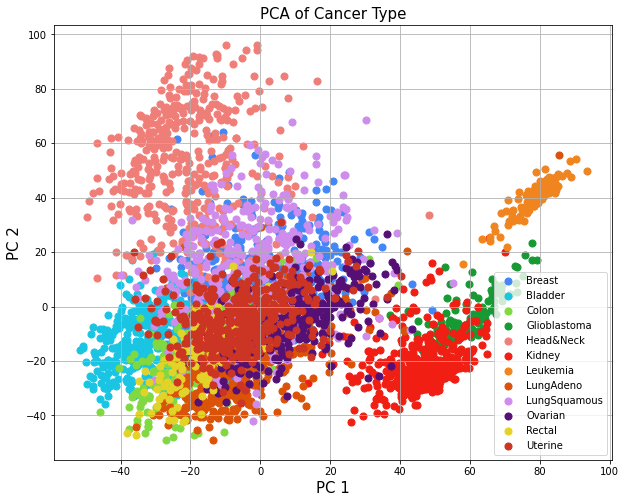

In [50]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('PCA of Cancer Type', fontsize = 15)

colors = {"Breast": '#4287f5',
          "Bladder": '#19c5e3',
          "Colon": '#80d941',
          "Glioblastoma": '#179933',
          "Head&Neck": '#f07e78',
          "Kidney": '#f01e13',
          "Leukemia": '#f0841f', 
          "LungAdeno": '#db5209',    
          "LungSquamous": '#ce8ced',  
          "Ovarian": '#551075',  
          "Rectal": '#e3d329',       
          "Uterine": '#cc3423'}

for color in colors:
    final =dfPCA_final['Class']== color
    ax.scatter(dfPCA_final.loc[final, 'principal component 1'],dfPCA_final.loc[final,'principal component 2'], c = colors[color], s = 50)

ax.legend(colors)
ax.grid()

In [51]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
model = LinearSVC()
model.fit(X_train,Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 0.97


Confusion matrix, without normalization
[[ 59   0   0   0   0   0   0   0   0   0   0   0]
 [  0 191   0   0   0   0   0   0   0   0   0   0]
 [  0   0  59   0   0   0   0   0   0   0   7   0]
 [  0   0   0  28   0   0   0   0   0   0   0   0]
 [  0   0   0   0  81   0   0   0   0   0   0   0]
 [  0   0   0   0   0  88   0   0   0   0   0   0]
 [  0   0   0   0   0   0  20   0   0   0   0   0]
 [  0   0   0   0   0   1   0  85   1   0   0   0]
 [  0   0   0   0   0   0   0   2  67   0   0   0]
 [  0   0   0   0   0   0   0   0   0  74   0   0]
 [  0   0  16   0   0   0   0   0   0   0  15   0]
 [  0   0   0   0   0   0   0   0   0   0   0  74]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.89 0.   0.   0.   0.   0.   0.   0.   0.11 0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.

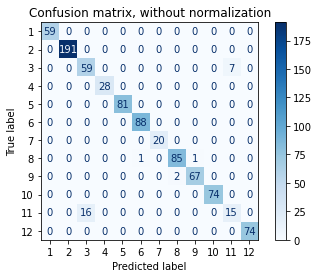

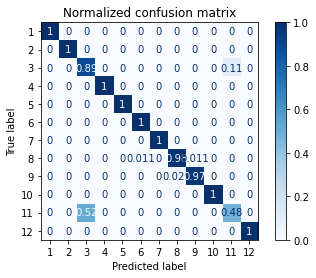

In [52]:
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
labels =  {"1":"Breast","2":"Bladder","3":"Colon","4":"Glioblastoma","5": "Head&Neck","6":"Kidney","7":"Leukemia","8":"LungAdeno","9":"LungSquamous","10":"Ovarian","11":"Rectal","12":"Uterine"}
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [53]:
model = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
model.fit(X_train,Y_train)

print('Accuracy of SVC on training set: {:.2f}'.format(model.score(X_train, Y_train) * 100))

print('Accuracy of SVC on test set: {:.2f}'.format(model.score(X_test, Y_test) * 100))

Accuracy of SVC on training set: 100.00
Accuracy of SVC on test set: 96.43
